# A brief tour of SpacePy and Python

This is a quick tour of SpacePy/Python. It's not comprehensive by any means.
If at any time you want to get help on anything, type the command and put a question mark at the end.

(I am assuming you're running iPython. If you're just in a plain Python interpreter, please do yourself a favor and quit. Go use iPython.)

In [1]:
%matplotlib inline
#this is some ipython magic to make the plots appear in the tutorial, just ignore it for now

In [2]:
list?

This will work for anything in Python, including SpacePy. SpacePy also has HTML documentation.
Launch it by importing SpacePy, then calling the help function.

In [3]:
import spacepy
spacepy.help()

That'll work on the SpacePy releases out of the box. If you pulled from SpacePy's git repository and built it yourself then
you'll need to explicitly build the documentation on install. The warning above will also only be seen if you aren't using an official release - if you don't have documentation built it will raise an exception.

First let's grab some data from the web. Let's start with magnetic ephemeris data from the Van Allen Probes mission.
(JUNE 2016 UPDATE: The ECT SOC website has been down a lot and has changed to HTTPS, with an invalid certificate, so the original instructions for download no longer work. If a valid certificate is ever provided, the following should work... for now, we assume a POSIX system and make a call to wget.)

In [4]:
import httplib, os, ssl, subprocess
serveurl = "www.rbsp-ect.lanl.gov"
directory = "/data_pub/rbspa/MagEphem/def/2012"
filename = "rbspa_def_MagEphem_TS04D_20121004_v2.1.0.txt"

#conn = httplib.HTTPSConnection(serveurl, context=ssl._create_unverified_context())
#conn.request("GET",os.path.join(directory,filename))
fn = "https://"+serveurl+directory+'/'+filename
rc = subprocess.call(['wget','--no-check-certificate', fn])
print(rc, fn)

(0, 'https://www.rbsp-ect.lanl.gov/data_pub/rbspa/MagEphem/def/2012/rbspa_def_MagEphem_TS04D_20121004_v2.1.0.txt')


Now to do something with it. First we should open the data file in a text editor and take a look at the file.
When that's done we'll go ahead and load it using SpacePy's "datamodel" module.
This type of file is a JSON-headed ASCII file. The header contains all the metadata and is written using
JSON - JavaScript Object Notation.

In [5]:
import spacepy.datamodel as dm
data = dm.readJSONheadedASCII('rbspa_def_MagEphem_TS04D_20121004_v2.1.0.txt', convert=True)

The "convert" keyword has some defaults set and will attempt to convert ISO format times to the Python
native datetime format. You can specify your own dictionary of functions to pass in to convert data.
We're not going to cover that, but please check out the documentation.

In [6]:
data.tree()

+
|____Alpha
|____ApogeePosGeod
|____ApogeeTimes
|____AscendingNodeTimes
|____AscendingPosGeod
|____Bfn_geo
|____Bfn_gsm
|____Bfs_geo
|____Bfs_gsm
|____Bm
|____Bmin_gsm
|____BoverBeq
|____Bsc_gsm
|____CDMAG_MLAT
|____CDMAG_MLON
|____CDMAG_MLT
|____CDMAG_R
|____DOY
|____Date
|____DateTime
|____DipoleTiltAngle
|____DriftShellType
|____Dst
|____EDMAG_MLAT
|____EDMAG_MLON
|____EDMAG_MLT
|____EDMAG_R
|____ExtModel
|____FieldLineType
|____GpsTime
|____I
|____InOut
|____IntModel
|____InvLat
|____InvLat_eq
|____JulianDate
|____K
|____Kappa
|____Kp
|____L
|____Lm_eq
|____Loss_Cone_Alpha_n
|____Loss_Cone_Alpha_s
|____Lsimple
|____Lstar
|____M_igrf
|____M_ref
|____M_used
|____MlatFromBoverBeq
|____OrbitNumber
|____PerigeePosGeod
|____PerigeeTimes
|____Pfn_CD_MLAT
|____Pfn_CD_MLON
|____Pfn_CD_MLT
|____Pfn_ED_MLAT
|____Pfn_ED_MLON
|____Pfn_ED_MLT
|____Pfn_geo
|____Pfn_geod_Height
|____Pfn_geod_LatLon
|____Pfn_gsm
|____Pfs_CD_MLAT
|____Pfs_CD_MLON
|____Pfs_CD_MLT
|____Pfs_ED_MLAT
|____Pfs_ED_MLON
|_

Each variable has associated metadata, and the "tree" method can display more information about that. Since thee are so many variables, let's cut it down a bit and only keep the ones we're going to explore here.

In [7]:
allkeys = data.keys()
keepme = ['DateTime', 'DipoleTiltAngle', 'MlatFromBoverBeq', 'Rgeo', 'Rgsm', 'Lstar']
for key in allkeys:
    if key not in keepme:
        del data[key]
    else:
        pass #does nothing - often used as a placeholder of to make the flow of code easier to read

In [8]:
data.tree(attrs=True, verbose=True)

+
|____DateTime (spacepy.datamodel.dmarray (289,))
    :|____DESCRIPTION (unicode [47])
    :|____LABEL (unicode [4])
    :|____NAME (unicode [11])
    :|____START_COLUMN (int)
    :|____TITLE (unicode [12])
    :|____UNITS (unicode [3])
|____DipoleTiltAngle (spacepy.datamodel.dmarray (289,))
    :|____DESCRIPTION (unicode [73])
    :|____LABEL (unicode [27])
    :|____NAME (unicode [15])
    :|____START_COLUMN (int)
    :|____TITLE (unicode [17])
    :|____UNITS (unicode [7])
|____Lstar (spacepy.datamodel.dmarray (289, 18))
    :|____DEPEND_1 (unicode [5])
    :|____DESCRIPTION (unicode [54])
    :|____DIMENSION (list [1])
    :|____ELEMENT_LABELS (list [18])
    :|____ELEMENT_NAMES (list [18])
    :|____FILL_VALUE (float)
    :|____LABEL (unicode [12])
    :|____NAME (unicode [5])
    :|____START_COLUMN (int)
    :|____TITLE (unicode [6])
    :|____UNITS (unicode [13])
|____MlatFromBoverBeq (spacepy.datamodel.dmarray (289,))
    :|____DESCRIPTION (unicode [49])
    :|____FILL_VALUE (

Assume that we want tilt angle in radians... is it already? How would we know?

So let's check that the tilt angle is actually specified in degrees...

* Note that everything here is stored in a SpaceData object or a dmarray object. We will briefly come back to these later.

In [9]:
print(data['DipoleTiltAngle'].attrs['UNITS'])

Degrees


In [10]:
import spacepy.toolbox as tb
tb.pmm(data['DipoleTiltAngle'])

[[-14.3343253, 5.14875462]]

SpacePy's toolbox function pmm prints the maximum and minimum of the input array. That's a decent sanity check on the values, since the metadata might not be trustworthy!

Let's use numpy to convert the tilt angle to radians, then remember to update the metadata!

In [11]:
import numpy as np
data['DipoleTiltAngle'][...] = np.deg2rad(data['DipoleTiltAngle'])
data['DipoleTiltAngle'].attrs['UNITS'] = 'radians'

Note that we have a dictionary called "attrs" on our array of data!

SpacePy's datamodel contains two basic datatypes:

* SpaceData, which is a modified dictionary.
* dmarray, which is a modified NumPy array.

Both are modified to carry attributes, so you can combine the two to represent data and metadata stored in
hierarchical self-describing formats like HDF5 or CDF.

Anyway, back to what we were doing.

In [12]:
tb.pmm(data['DipoleTiltAngle'])

[[-0.25018117253692396, 0.08986272049626949]]

Now to do something with the data. I'm going to concentrate on the magnetic latitude.
The data we've loaded are at 5 minute cadence, so first we should do a boxcar average of that and get it at 30 minute cadence. This is made simple with SpacePy's toolbox.

In [13]:
import datetime as dt

In [14]:
values, tt = data['MlatFromBoverBeq'], data['DateTime']
starttime, overlap, winsize = dt.datetime(2012,10,4,0), dt.timedelta(0), dt.timedelta(minutes=30)
avdata, avtime = tb.windowMean(values, tt, st_time=starttime, overlap=overlap, winsize=winsize)

So what did that give us?

In [15]:
avdata[:4], avtime[:4]

([-17.456842857142856,
  -17.985885714285711,
  -18.401028571428572,
  -18.981457142857145],
 [datetime.datetime(2012, 10, 4, 0, 15),
  datetime.datetime(2012, 10, 4, 0, 45),
  datetime.datetime(2012, 10, 4, 1, 15),
  datetime.datetime(2012, 10, 4, 1, 45)])

It's probably time to visualize some of this. The de-facto standard plotting package for Python is MatPlotLib.
The syntax (and output) will probably look eerily familar to MatLab users. This is by design.

In [16]:
import matplotlib.pyplot as plt   # <---- this imports plotting functions
import spacepy.plot as splot      # <---- imports SpacePy's default plot styles, plus convenienec routines

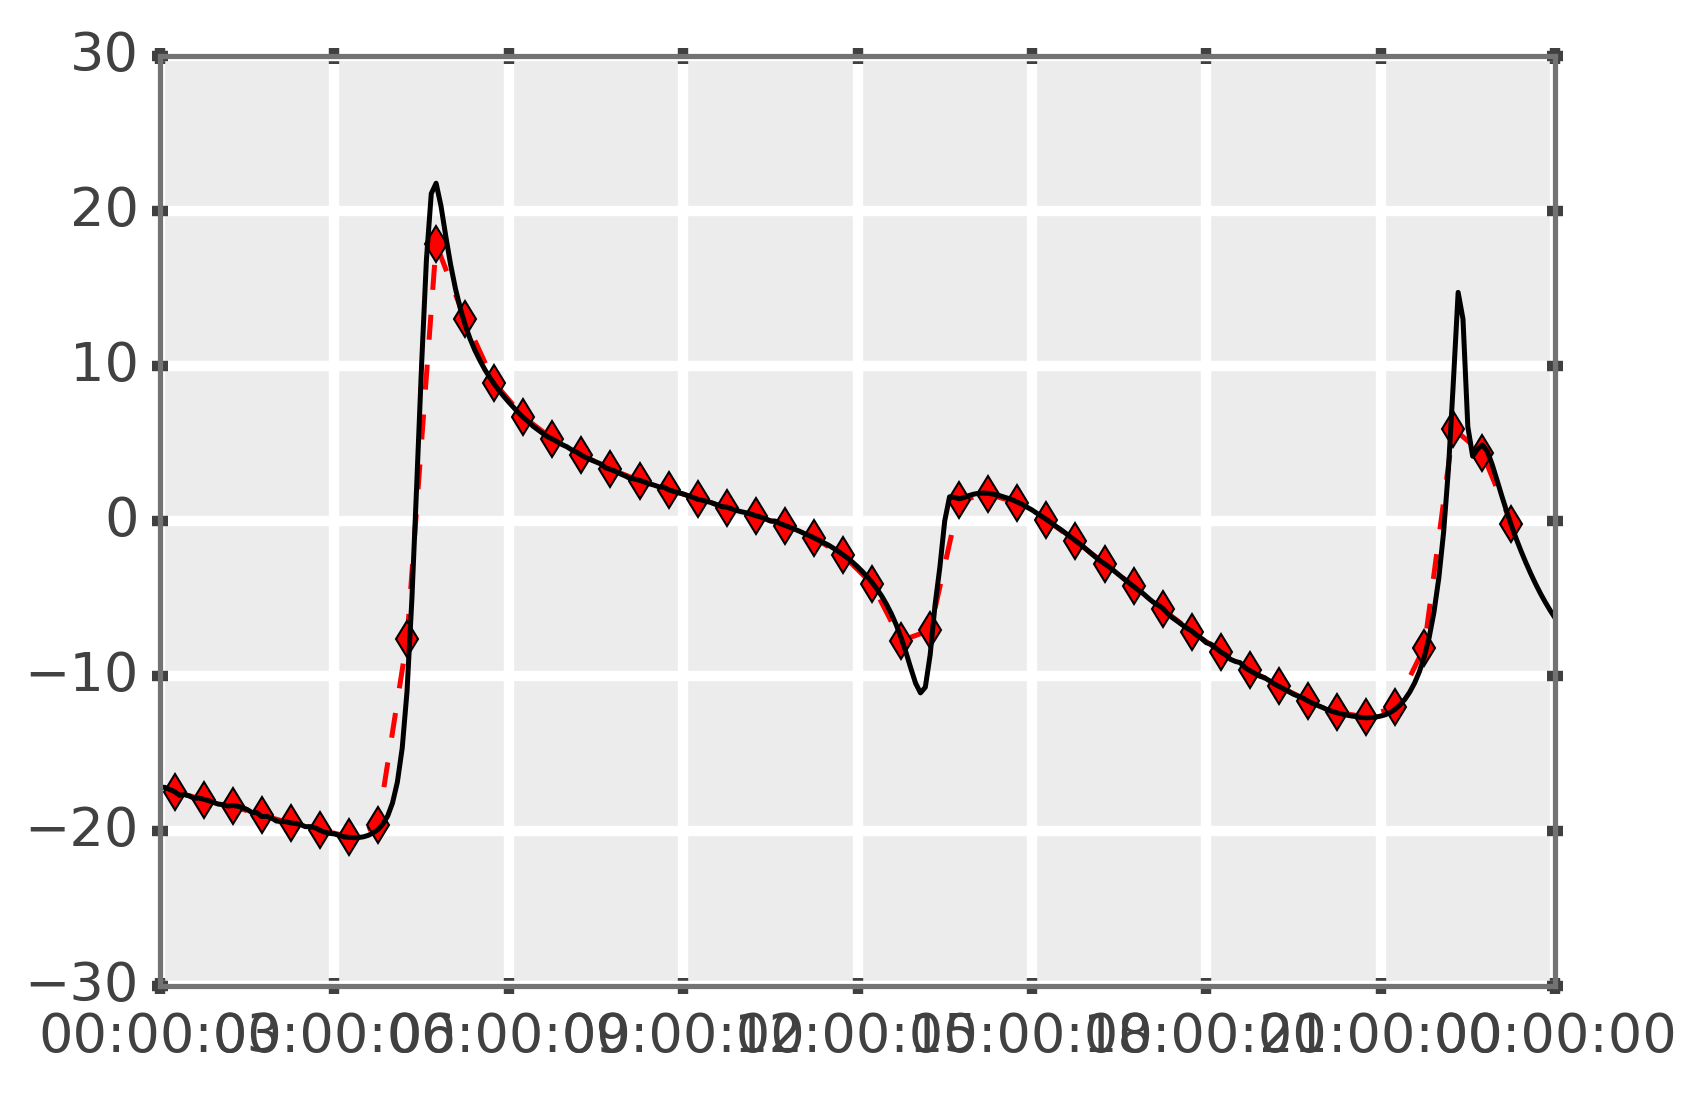

In [17]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
ax0.plot(avtime, avdata, 'r--d')
ax0.plot(data['DateTime'], data['MlatFromBoverBeq'], 'k-')

In [18]:
#plt.show() #<--- and for those you you following along, to display the figure you might need this command
#so that figures are always shown, and don't interrupt the console, use plt.ion()

Okay, that all looked good. The smoothed data preserves the mean, but we've lost the short term peaks and troughs.
If you look at the help for windowMean you'll note that you can easily do running means too (using the overlap keyword).

Next we'll take a look at **where** RBSP-A is.

In [19]:
import spacepy.time as spt
import spacepy.coordinates as spc
import spacepy.irbempy as ib

SpacePy has modules that handle time format conversion and coordinate conversion. The latter uses the IRBEM library - a FORTRAN library quite widely used in the field. At LANL we have our own C-based library to do all the jobs IRBEM does (but at high precision), and that's what produced the data in the file. Let's compare some results.

In [20]:
ticks = spt.Ticktock(data['DateTime'][:3], 'UTC')
ticks

Ticktock( [datetime.datetime(2012, 10, 4, 0, 0) datetime.datetime(2012, 10, 4, 0, 5)
 datetime.datetime(2012, 10, 4, 0, 10)], dtype=UTC)

To illustrate the sort of time system conversion available, we can print the first value out in several systems.

In [21]:
print('Original time was {0}\n\nGPS time = {1}\nJulian day = {2}\nISO8601 format = {3}'
      .format(ticks[0].data, ticks[0].GPS, ticks[0].JD, ticks[0].ISO))

Original time was [datetime.datetime(2012, 10, 4, 0, 0)]

GPS time = [  1.03334402e+09]
Julian day = [ 2456204.5]
ISO8601 format = ['2012-10-04T00:00:00']


Let's get back on track and look at the ephemeris for this satellite in geocentric Cartesian coordinates

In [22]:
loci = spc.Coords(data['Rgeo'][:3,:], 'GEO', 'car')
loci.ticks = ticks

We'll use the IRBEM library to calculate Roederer's generalized L (aka L*). You may remember that this is inversely proportional to the 3rd adiabatic invariant ($\Phi$).

In [23]:
LS90 = ib.get_Lstar(ticks, loci, 90, extMag='T05')
LS90

{'Bmin': array([ 116.86444077,  116.8147457 ,  116.92912256]),
 'Bmirr': array([[ 172.92773729],
        [ 173.44387281],
        [ 174.19447909]]),
 'Lm': array([[ 6.21702373],
        [ 6.21875677],
        [ 6.21753114]]),
 'Lstar': array([[ 5.43555522],
        [ 5.43957622],
        [ 5.43546318]]),
 'MLT': array([ 7.02936187,  7.08499845,  7.14077608]),
 'Xj': array([[ 1.46921372],
        [ 1.48614964],
        [ 1.50198096]])}

Print the difference between the two Lstar series.
** Lstar data from the ephemeris file is in a 2-D array, so we need to pay attention to that.**

In [24]:
print(LS90['Lstar'].ravel()-data['Lstar'][:3,0]) #ravel flattens the array into a 1D row vector

[-0.03741478 -0.03532378 -0.03614682]


You can either trust this tutorial when it tells you that column 0 in the Lstar variable is for 90 degree pitch angle... or you can check yourself. There should be enough information in the variable "attrs" to convince yourself.

So now let's see what IRBEM gives us if we run at the maximum precision.

In [25]:
LS90_HQ = ib.get_Lstar(ticks, loci, 90, extMag='T05', options=[1,1,9,9,0])

In [26]:
print(LS90_HQ['Lstar'].ravel()-data['Lstar'][:3,0])

[-0.02111203 -0.02153146 -0.01647902]


Closer... Testing on analytic magnetic field models has shown that as IRBEM runs at higher precision the answers converge to the expected values. LanlGeoMag reproduces the expected values to near machine-precision.

Let's check out the coordinate conversions. We already used the geographic coordinates to calculate L*. Now we'll change to GSM (Geocentric Solar Magnetospheric) coordinates and compare that to the calculated values in the file.

In [27]:
loci_GSM = loci.convert('GSM', 'car')

In [28]:
print(loci_GSM.data - data['Rgsm'][:3,:])

[[ 0.00051601  0.00010733  0.00022083]
 [ 0.00051191  0.0001126   0.00023046]
 [ 0.00050847  0.00011889  0.00023804]]


I'm a bit curious to see which latitudes Van Allen Probes sampled on that day. Let's plot a histogram of the latitudes sampled.

In [29]:
binwidth, nbins = tb.binHisto(data['MlatFromBoverBeq'])

I'm going to have two plot windows in my figure, so I can compare different binning schemes. Choosing the right number of bins can be important for interpreting histogram data. SpacePy's toolbox implements the Freedman-Diaconis method for determining the optimal number of bins. It's good for most distributions (extreme value distributions may not give great results).

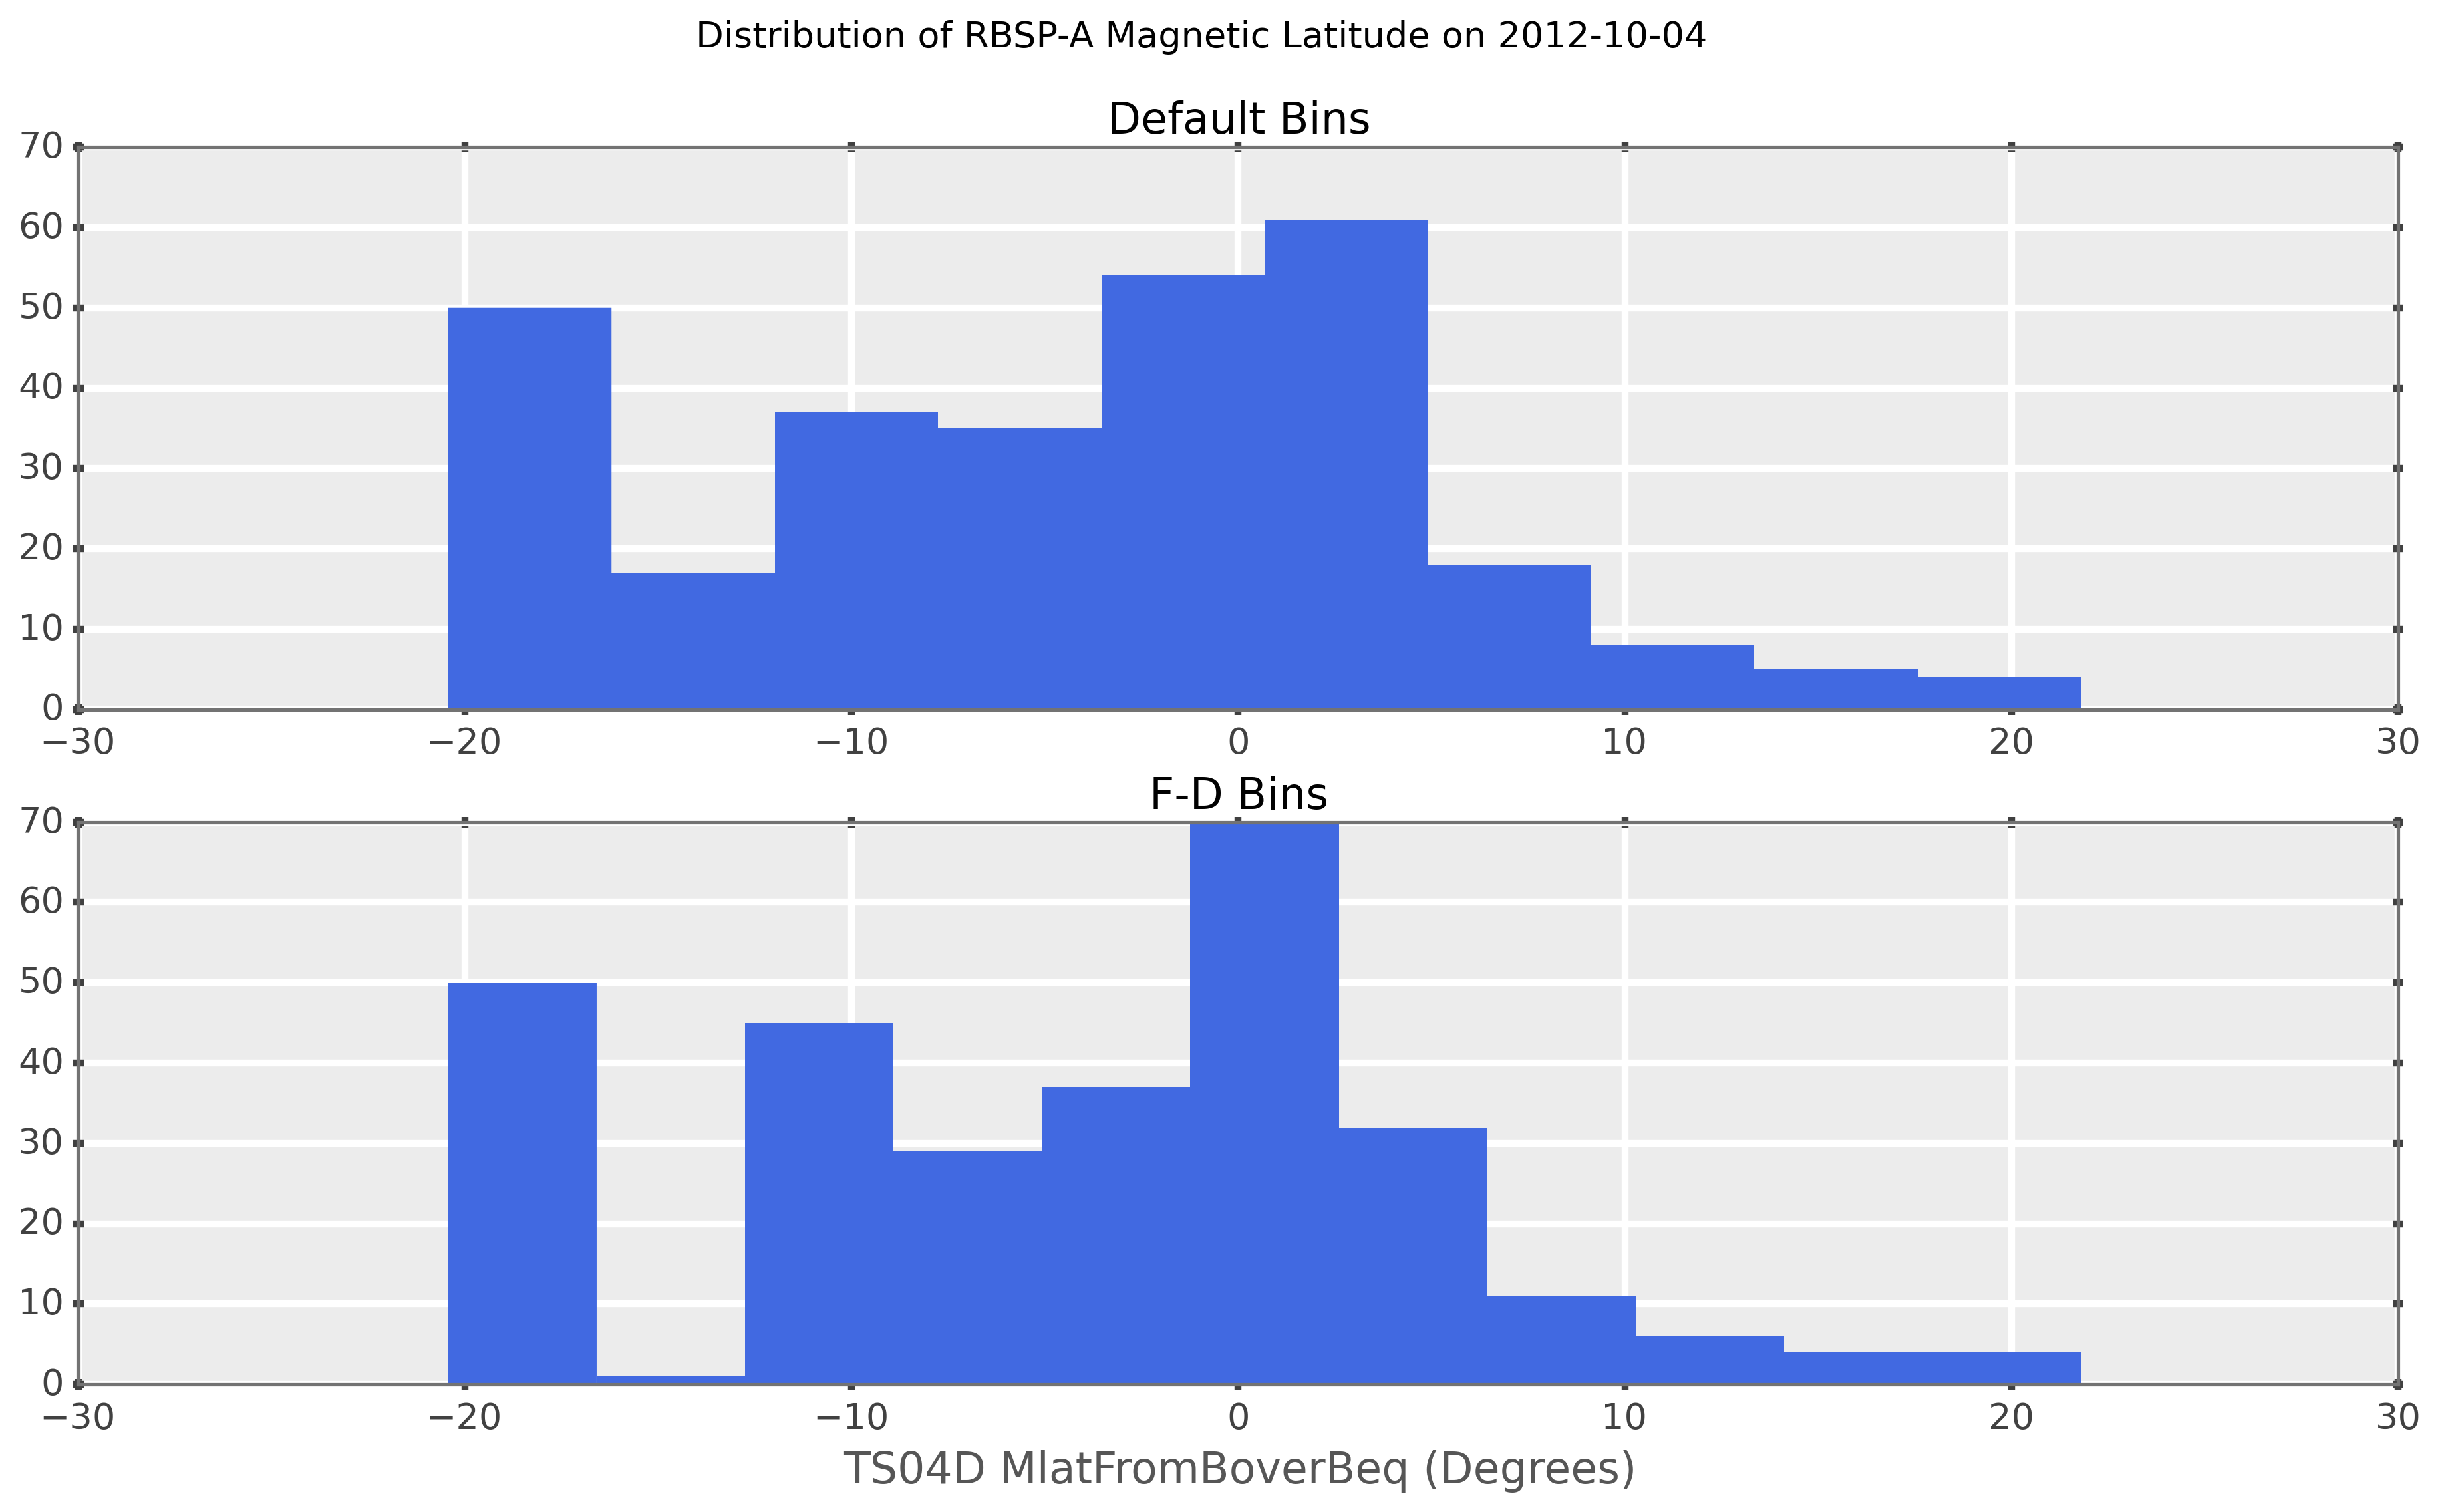

In [33]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.hist(data['MlatFromBoverBeq'])
ax2.hist(data['MlatFromBoverBeq'], bins=nbins)
#now to pretty the plot up... get it some labels, etc.
date_str = '{0}'.format((data['DateTime'][0]).date().isoformat())
fig.suptitle('Distribution of RBSP-A Magnetic Latitude on {0}'.format(date_str))
ax.set_title('Default Bins')
ax2.set_title('F-D Bins')
ax2.set_xlabel('{0}'.format(data['MlatFromBoverBeq'].attrs['LABEL']))

I want to keep this figure, so we'll save it. Publication quality PNG?

In [34]:
plt.savefig('MLat_plot.png', dpi=300)

And maybe as PDF too.

In [35]:
plt.savefig('MLat_plot.pdf')

### Using the OMNI module

What was the solar wind doing at this time? And how about some geomagnetic indices? Well, we could go fill in some web forms, but for a quick look we can just use SpacePy's omni module.

In [36]:
import spacepy.omni as om

So let's grab the data for that day. I forget which day we were looking at, but I know where the timestamps are so we'll just use those.

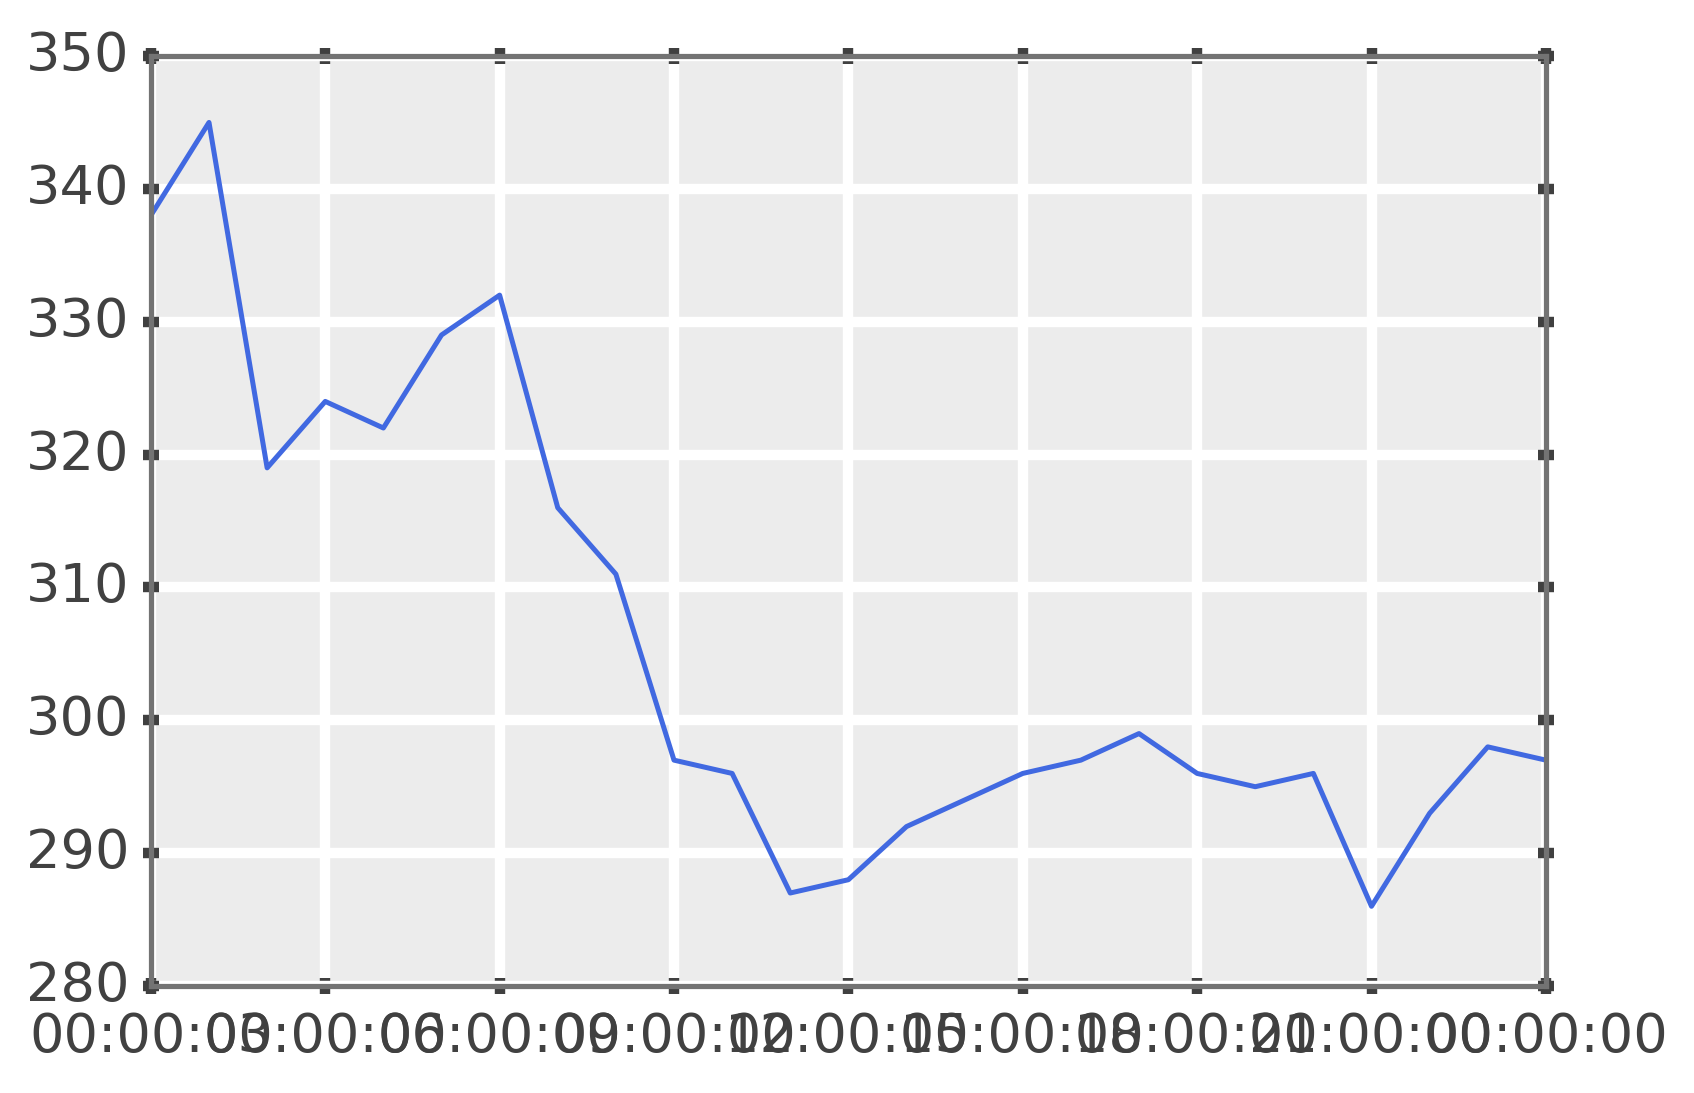

In [37]:
omnidata = om.get_omni(data['DateTime'])
plt.plot(omnidata['UTC'], omnidata['velo'])

Wow, those timestamps are a mess! Let's fix them up with a little magic.

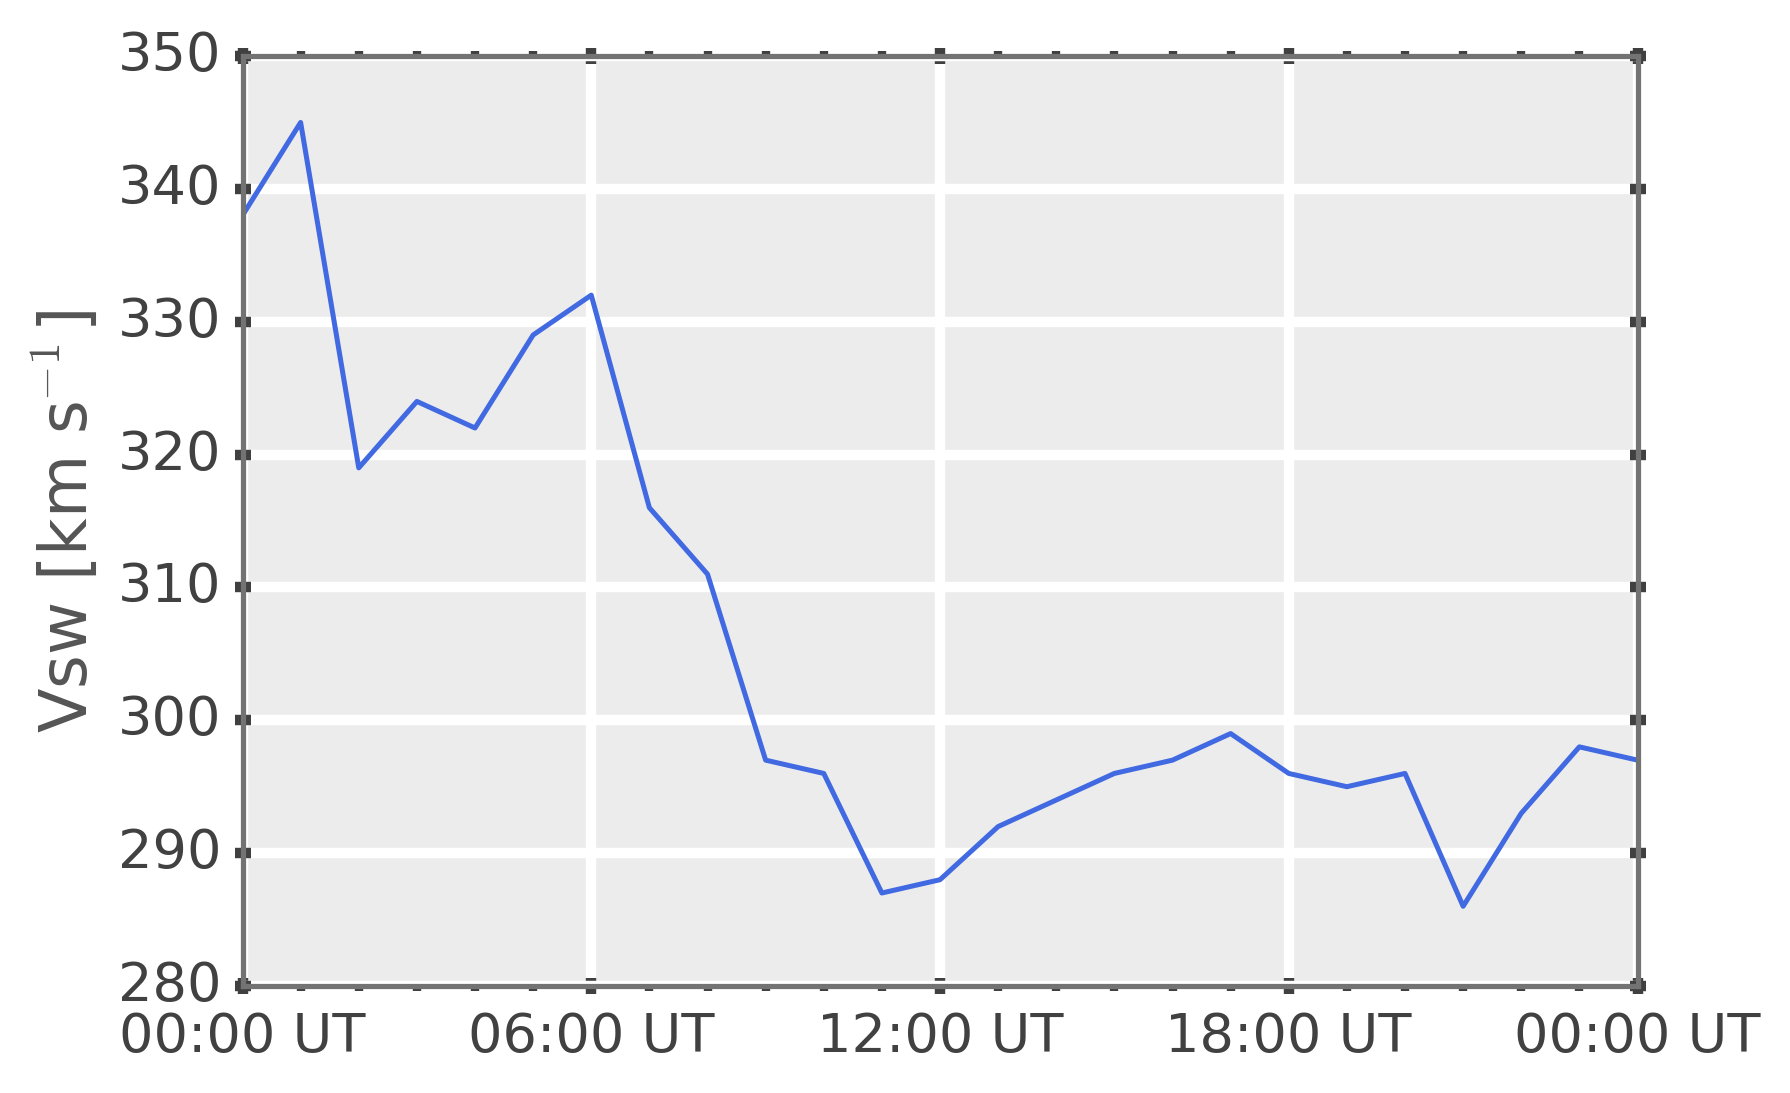

In [38]:
import spacepy.plot.utils as spu
plt.plot(omnidata['UTC'], omnidata['velo'])
messyaxis = plt.gca() #borrowed from MatLab, the gca (get current axis) function returns the handle for the current plot axis
spu.applySmartTimeTicks(messyaxis, omnidata['UTC'])

#and add an axis label...
messyaxis.set_ylabel('Vsw [km s$^{-1}$]')

Now let's assume that we have a collaborator (or advisor) who really, really wants the smoothed magnetic latitude data in a CDF file.

For some reason they also want the solar wind velocity on the same timebase, and the magnetopause stand-off location.

***THE OMNI MODULE, BY DEFAULT, WORKS WITH HOURLY DATA. IT WILL INTERPOLATE HOURLY DATA TO WHATEVER TIMES YOU ASK FOR.***
It's totally possible to use higher time resolution data with the omni module, but I'm not going to cover it here. Let me know if you want to know about that.

If you've got the CDF library installed, great, otherwise assume that the mystery collaborator changed their mind and wants HDF5.
Can we do this?

***Of course!***

In [39]:
import spacepy.pycdf

Version check.

In [40]:
spacepy.pycdf.lib.version

(3, 6, 0, '4')

Remember, you can always find out what's in modules by tab-completing in the ipython interpreter.

pycdf is great for the expert user, or for tricky jobs, but when you just want a file read or written quickly, head for the datamodel module.

In [41]:
avSWdata, avSWtime = tb.windowMean(omnidata['velo'], omnidata['UTC'], st_time=dt.datetime(2012,10,4,0), overlap=dt.timedelta(0), winsize=dt.timedelta(minutes=30))

We should probably check that the timebase is the same...

In [42]:
avSWtime == avtime

True

Phew.

Time to put everything in a data structure.

In [43]:
out = dm.SpaceData(attrs={'Created By': 'Me'}) #Good to have traceability
out['Epoch'] = dm.dmarray(avtime) #doesn't matter which we take since they're the same
out['Vsw'] = dm.dmarray(avSWdata)

We should probably keep any metadata these variables have.

In [44]:
out['Vsw'].attrs = dm.dmcopy(omnidata['velo'].attrs)
out['MLat'] = dm.dmarray(avdata, attrs=dm.dmcopy(data['MlatFromBoverBeq'].attrs))
out.tree(attrs=True)

+
:|____Created By
|____Epoch
|____MLat
    :|____DESCRIPTION
    :|____FILL_VALUE
    :|____LABEL
    :|____NAME
    :|____START_COLUMN
    :|____TITLE
    :|____UNITS
|____Vsw


We're still missing the magnetopause stand-off location.

In [45]:
import spacepy.empiricals as emp
mp_loc = emp.getMPstandoff(spt.Ticktock(avSWtime)) #most of SpacePy likes to use Ticktock to hold time
out['ShueMP'] = dm.dmarray(mp_loc)

Let's quickly plot this up before we save it to a file...

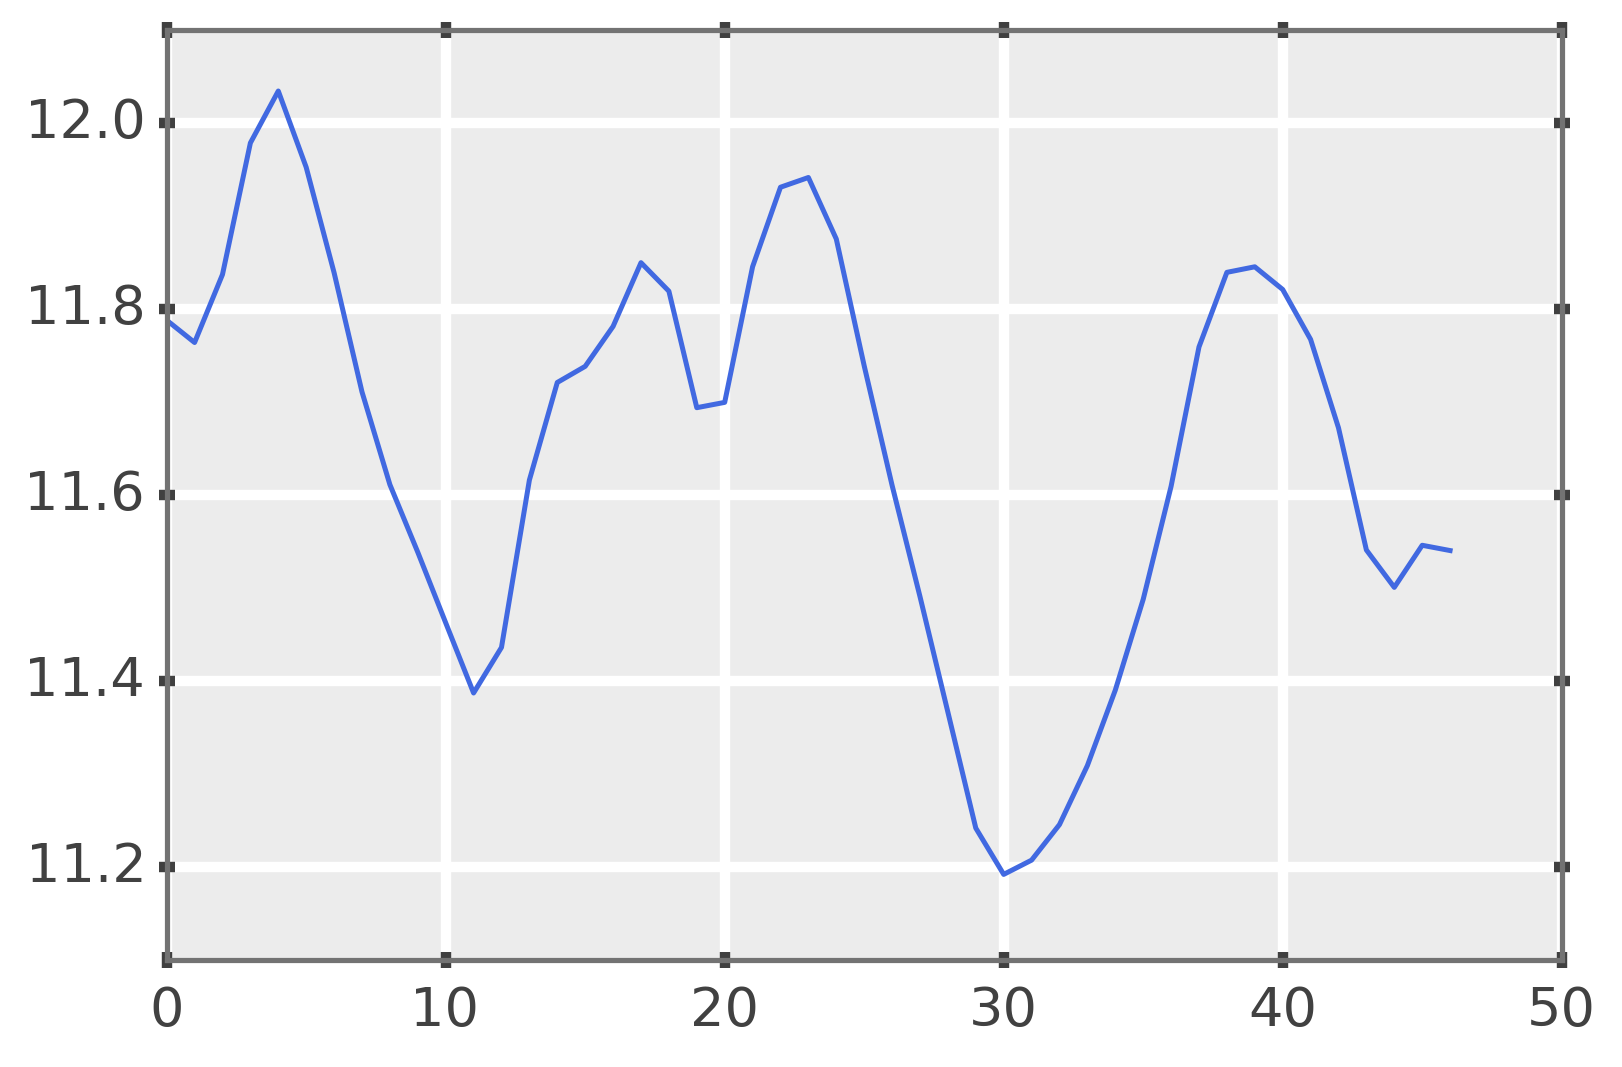

In [46]:
plt.plot(out['ShueMP'])

In [48]:
dm.toCDF('DataForTheBoss.cdf', out)

If you have Autoplot (or if you have a functioning Java web start and launch Autoplot from their website), you should be able to view the contents of the CDF. Or you can use the CDF command line utilities to inspect the file.